In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [2]:
lmf = pd.read_csv("data/lmf.csv", sep=',')

In [3]:
my_score = {'mate': 9.5, 'ro': 9.4, 'fizica': 9.7, 'media': 9.53}
my_record = lmf[(lmf['NOTA_EA'] == my_score['ro']) & (lmf['NOTA_EC'] == my_score['mate']) & (lmf['NOTA_ED'] == my_score['fizica'])]
my_record

,Cod unic candidat,Sex,Specializare,Profil,Fileira,Forma de învățământ,Mediu candidat,Unitate (SIIIR),Unitate (SIRUES),Clasa,...,NOTA_CONTESTATIE_EA,CONTESTATIE_EB,NOTA_CONTESTATIE_EB,CONTESTATIE_EC,NOTA_CONTESTATIE_EC,CONTESTATIE_ED,NOTA_CONTESTATIE_ED,PUNCTAJ DIGITALE,STATUS,Medie
37,429923,M,Matematica-Informatica,Real,Teoretica,Zi,URBAN,2161100876,210539881.0,a XII-a B,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,92,Promovat,9.53


In [4]:
# Some scores are higher than 10 due to preprocessing stage
lmf_cleaned = lmf[(lmf[['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']] <= 10.0).all(axis=1)]

In [5]:
my_scores = {'NOTA_EA': 9.4, 'NOTA_EC': 9.5, 'NOTA_ED': 9.7, 'Medie': 9.53}

## School-wide results (promoted only)

In [6]:
lmf_promovat = lmf_cleaned[(lmf_cleaned['STATUS'] == 'Promovat')]

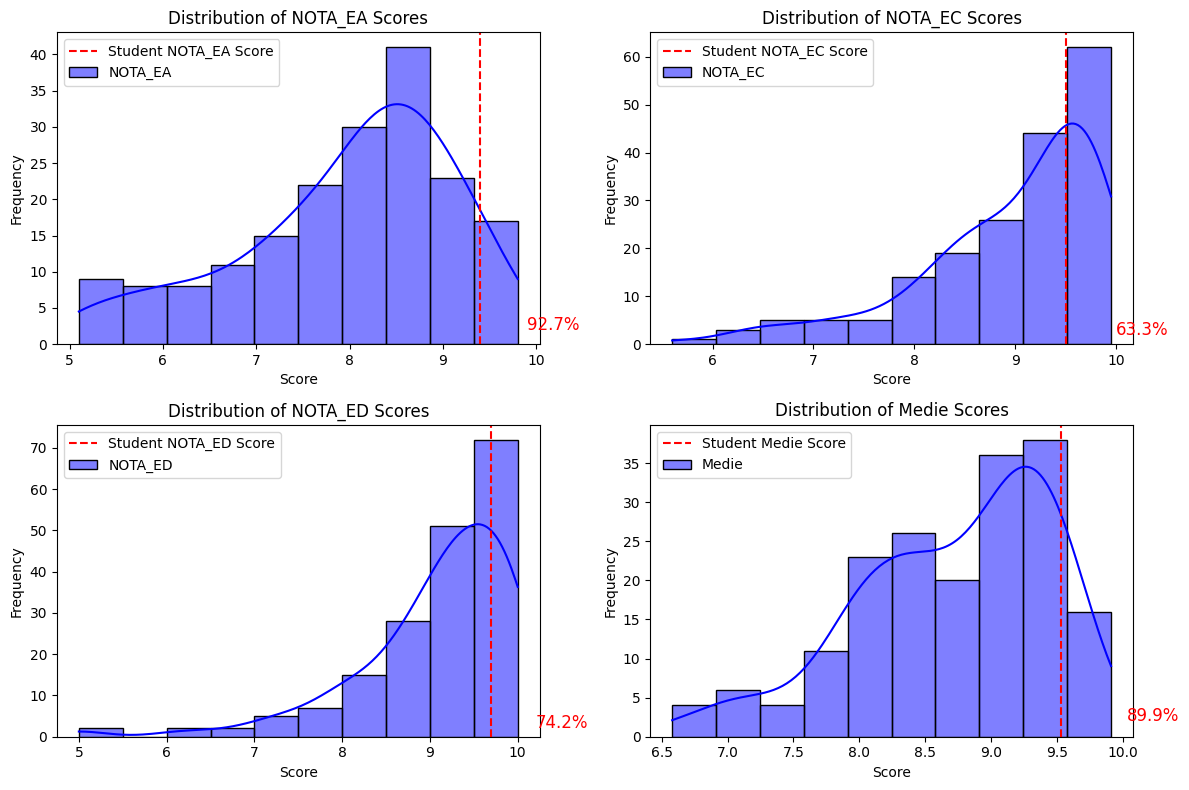

In [15]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot distributions and highlight the student's score
for i, subject in enumerate(['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1th subplot
    sns.histplot(lmf_promovat[subject], kde=True, color='blue', bins=10, label=subject)
    
    # Calculate the percentile of the student's score
    percentile = percentileofscore(lmf_promovat[subject], my_scores[subject])
    
    # Add a vertical line at the student's score
    plt.axvline(my_scores[subject], color='red', linestyle='--', label=f"Student {subject} Score")
    
    # Add text annotation with the percentile
    plt.text(my_scores[subject] + 0.5, 2, f"{percentile:.1f}%", color='red', fontsize=12)
    
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('results/schoolwide.png')
plt.show()


## School-wide results (mathematics-informatics)

In [8]:
unique_values_ec = lmf_promovat['Subiect ec'].unique()
unique_values_ec

array(['Matematică ST-NAT', 'Matematică MATE-INFO', 'Istorie',
       'Matematică TEHN'], dtype=object)

In [9]:
lmf_promovat_mateinfo = lmf_promovat[(lmf_promovat['Subiect ec'] == 'Matematică MATE-INFO')]
lmf_promovat_mateinfo;

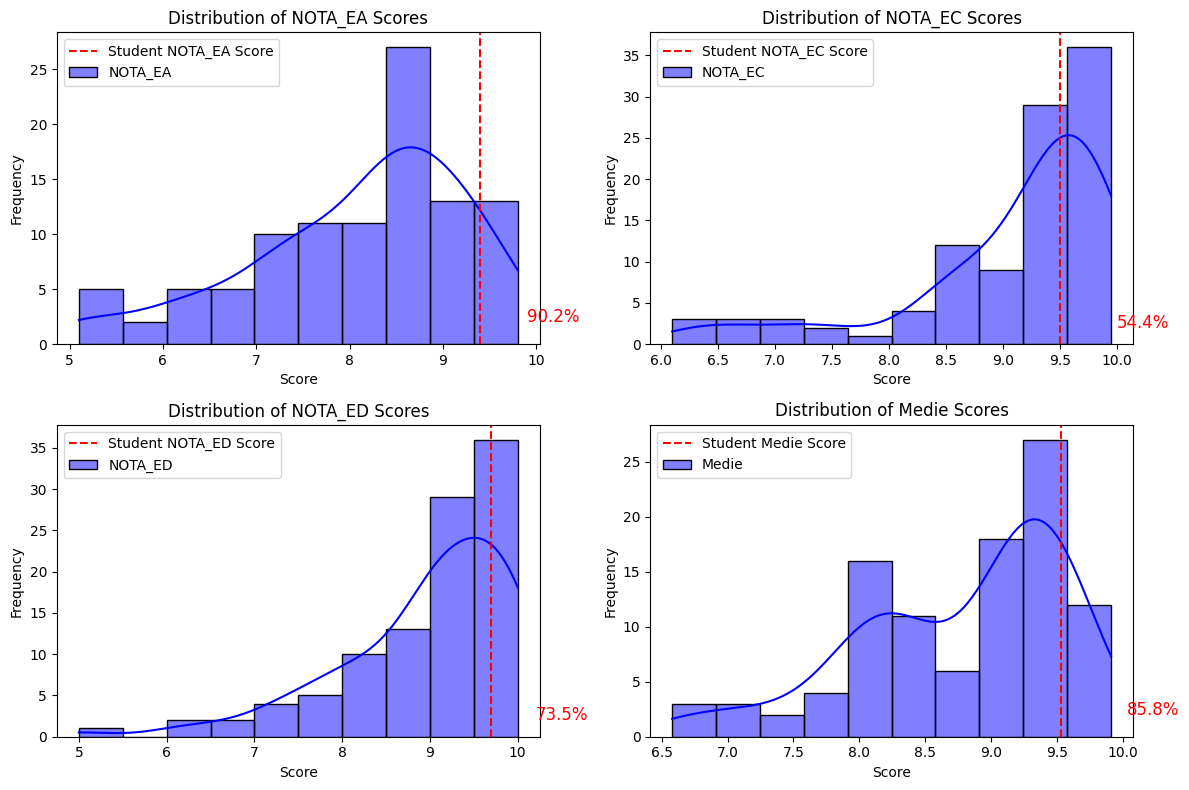

In [14]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot distributions and highlight the student's score
for i, subject in enumerate(['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1th subplot
    sns.histplot(lmf_promovat_mateinfo[subject], kde=True, color='blue', bins=10, label=subject)
    
    # Calculate the percentile of the student's score
    percentile = percentileofscore(lmf_promovat_mateinfo[subject], my_scores[subject])
    
    # Add a vertical line at the student's score
    plt.axvline(my_scores[subject], color='red', linestyle='--', label=f"Student {subject} Score")
    
    # Add text annotation with the percentile
    plt.text(my_scores[subject] + 0.5, 2, f"{percentile:.1f}%", color='red', fontsize=12)
    
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('results/schoolwide_mathinfo.png')
plt.show()


## My classroom results

In [11]:
lmf_promovat_mateinfo_XIIB = lmf_promovat_mateinfo[(lmf_promovat_mateinfo['Clasa'] == 'a XII-a B')]

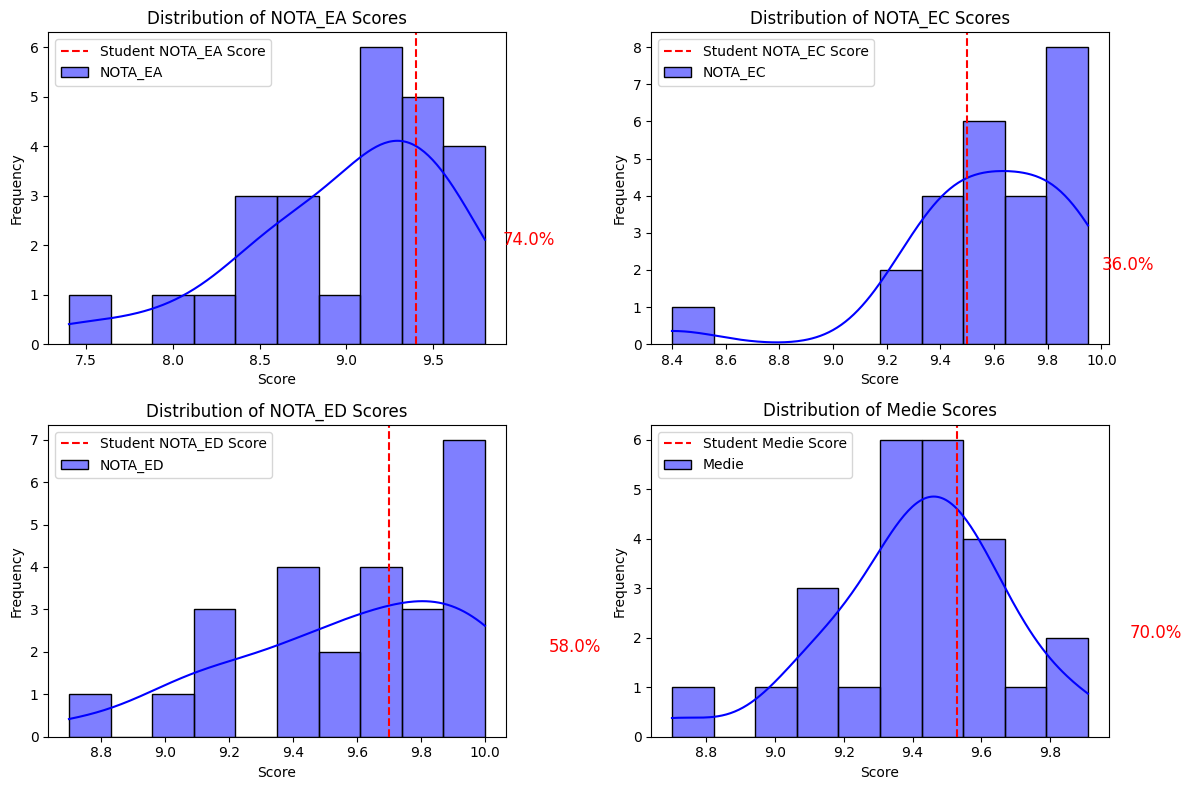

In [13]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot distributions and highlight the student's score
for i, subject in enumerate(['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1th subplot
    sns.histplot(lmf_promovat_mateinfo_XIIB[subject], kde=True, color='blue', bins=10, label=subject)
    
    # Calculate the percentile of the student's score
    percentile = percentileofscore(lmf_promovat_mateinfo_XIIB[subject], my_scores[subject])
    
    # Add a vertical line at the student's score
    plt.axvline(my_scores[subject], color='red', linestyle='--', label=f"Student {subject} Score")
    
    # Add text annotation with the percentile
    plt.text(my_scores[subject] + 0.5, 2, f"{percentile:.1f}%", color='red', fontsize=12)
    
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('results/classwide.png')
plt.show()
